## Client Credentials Flow

We have used the following client credentials flow in server-to-server authenticatio. This flow does not include authorization, just the endpoints that do not acces user information of spotify profiles. Below diagram shows the process and flow:

##### 1. Request access token:
We request the acces token by sending the client_id, client_secret to the spotify service. This service then returns an acces token that have an expirary timeframe of 1 hour (3600 seconds). 

##### 2. Having Acces Token: 
Now having acces token we can send the request to the spotify web API, which allows us to get informaiton such as track name, artis, date, region etc. 


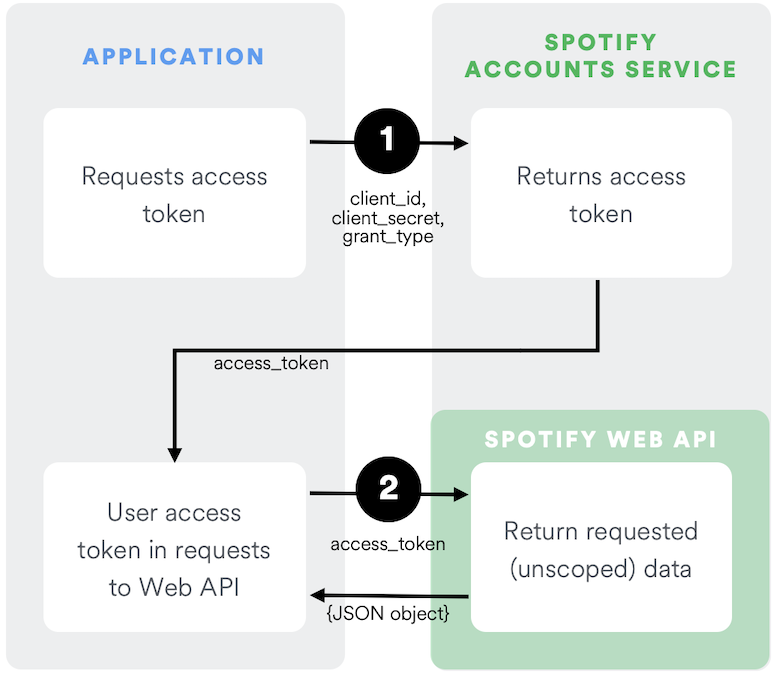

In [23]:
from IPython.display import Image

Image(filename='auth-client-credentials.png', width=500, height=500)


In [24]:
from dotenv import load_dotenv
import requests
import os
import base64 
import json

In [25]:
# Load the environment variables
load_dotenv()

# Get our API key from the environment
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [26]:
# Create a function to get the access token
def get_auth_token():
    auth_str = client_id + ':' + client_secret
    auth_byte = auth_str.encode('utf-8')

    # returns a base64 object, we need to convert it to a string
    auth_base64 = str(base64.b64encode(auth_byte), 'utf-8')
    
    # write the url we want to send the request to
    url = "https://accounts.spotify.com/api/token"
    
    # create headers to send our authentication data and verify the user
    headers = { "authorization": "Basic " + auth_base64, "content-type": "application/x-www-form-urlencoded"}
    
    # create the data we want to send to the server
    data = {"grant_type": "client_credentials"}
    
    # the body of the request
    res = requests.post(url, headers=headers, data=data)
    
    # convert the response to a json object
    json_res = json.loads(res.content)
    token = json_res['access_token']
    
    # return the token we got
    return token

# We can now call the function to get the authentication token and give us access to all rest of the API
token = get_auth_token()

# print the token
print(token)

BQBC0v61mFoRHhB2bcXPXDgo1QdpQXS7CCgeitRGraM0l11nYRDmK-kbPokAWNHXRBMS-mMyx7zDkZOwo_-hRqyu4oGv4u40nNnHTPT2tesZw8UD4_Y


In [27]:
# import spotify
import spotipy
import pandas as pd
import time
from spotipy.oauth2 import SpotifyClientCredentials

# We set up client id and client secret
client_credentials_mgt = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_mgt)

In [32]:
def get_track_features(track):
    audio_features = sp.audio_features(track['id'])[0]
    return audio_features

def get_artist_details(track):
    artist_id = track['artists'][0]['id'] if track['artists'] else None
    artist_details = sp.artist(artist_id) if artist_id else None
    return artist_details

def append_track_data(data, track, audio_features, artist_details):
    data['id'].append(track['id'])
    data['name'].append(track['name'])
    data['popularity'].append(track['popularity'])
    data['get available markets'].append(track['available_markets'])
    data['explicit'].append(track['explicit'])
    data['release_date'].append(track['album']['release_date'])
    data['album'].append(track['album']['name'])
    data['artist'].append(artist_details['name'] if artist_details else None)
    data['genre'].append(artist_details['genres'][0] if artist_details and artist_details['genres'] else None)
    data['artist_popularity'].append(artist_details['popularity'] if artist_details else None)
    data['artist_followers'].append(artist_details['followers']['total'] if artist_details else None)
    data['artist_genres'].append(artist_details['genres'] if artist_details else None)
    data['danceability'].append(audio_features['danceability'])
    data['energy'].append(audio_features['energy'])
    data['key'].append(audio_features['key'])
    data['loudness'].append(audio_features['loudness'])
    data['mode'].append(audio_features['mode'])
    data['speechiness'].append(audio_features['speechiness'])
    data['acousticness'].append(audio_features['acousticness'])
    data['instrumentalness'].append(audio_features['instrumentalness'])
    data['liveness'].append(audio_features['liveness'])
    data['valence'].append(audio_features['valence'])
    data['tempo'].append(audio_features['tempo'])
    data['duration_ms'].append(audio_features['duration_ms'])
    data['time_signature'].append(audio_features['time_signature'])
    data['analysis_url'].append(audio_features['analysis_url'])
    data['track_href'].append(audio_features['track_href'])

def get_track_data(query_list, limit=50):
    # Initialize an empty dictionary to store the track data
    data = {
        'id': [],
        'name': [],
        'popularity': [],
        'get available markets': [],
        'explicit': [],
        'release_date': [],
        'album': [],
        'artist': [],
        'genre': [],
        'artist_id': [],
        'artist_popularity': [],
        'artist_followers': [],
        'artist_genres': [],
        'danceability': [],
        'energy': [],
        'key': [],
        'loudness': [],
        'mode': [],
        'speechiness': [],
        'acousticness': [],
        'instrumentalness': [],
        'liveness': [],
        'valence': [],
        'tempo': [],
        'duration_ms': [],
        'time_signature': [],
        'analysis_url': [],
        'track_href': [],
    }

    # Loop over the queries
    for query in query_list:
        # Search for tracks
        results = sp.search(query, limit=limit, type='track')
        tracks = results['tracks']['items']

        # Loop over the tracks
        for track in tracks:
            # Get the audio features 
            audio_features = get_track_features(track)

            # Get artist details
            artist_details = get_artist_details(track)

            # Append the track data to the dictionary
            append_track_data(data, track, audio_features, artist_details)
            
            time.sleep(10)
            
    # Create a DataFrame from the dictionary of track data
    df = pd.DataFrame(data)

    return df

genres = [
    'genre:"Dansk"', 
]

s_df = get_track_data(genres, limit=50)

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=3k24hJgRLI1wwZ0lbNIXh6:
 Max Retries, reason: too many 429 error responses